In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [4]:
steam_charts = pd.read_csv("./datasets/steam_charts.csv", usecols=["Month", "Avg. Players", "Peak Players", "App ID", "Game"])

In [5]:
steam_charts = steam_charts.rename(columns = {"Game":"name", "App ID":"appid"}) # stores player count data

In [6]:
steam_info = pd.read_csv("./datasets/steam_info.csv", usecols=["steam_appid", "price"]) 

In [7]:
steam_info = steam_info.rename(columns = {"steam_appid":"appid"}) # stores price data

In [8]:
steamspy = pd.read_csv("./datasets/steamspy_data.csv", usecols=["appid", "owners", "price", "initialprice", "discount"]) 

In [9]:
steamspy = steamspy.rename(columns = {"price":"oldprice"}) # stores downloads info

In [10]:
df = pd.merge(steam_charts, steam_info, on = "appid", how = "inner") 

In [11]:
steamspy = steamspy.join(steamspy["owners"].str.split(pat=" .. ", expand=True))

In [12]:
del steamspy["owners"]

In [13]:
steamspy.columns = ['appid', 'oldprice', 'initialprice', 'discount', 'min_owners', 'max_owners']

In [14]:
steamspy["min_owners"] = steamspy["min_owners"].replace(',', '', regex=True).astype(int) # removes commas from min/max_owners

In [15]:
steamspy["max_owners"] = steamspy["max_owners"].replace(',', '', regex=True).astype(int) # i.e. 1,000,000 becomes 1000000

In [16]:
df = pd.merge(df, steamspy, on = "appid", how = "inner")

In [17]:
df["avg_owners"] = (df["max_owners"] + df["min_owners"])/2

In [18]:
df["avg_player_proportion"] = (df["Avg. Players"] / df["avg_owners"])*100

In [19]:
df["min_player_proportion"] = (df["Avg. Players"] / df["min_owners"])*100

In [20]:
df["max_player_proportion"] = (df["Avg. Players"] / df["max_owners"])*100

In [21]:
df #Cleaned up dataset

,Month,Avg. Players,Peak Players,appid,name,price,oldprice,initialprice,discount,min_owners,max_owners,avg_owners,avg_player_proportion,min_player_proportion,max_player_proportion
0,Last 30 Days,575701.03,906670,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.767601,1.151402,0.575701
1,June 2022,572222.47,906670,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.762963,1.144445,0.572222
2,May 2022,564961.70,923996,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.753282,1.129923,0.564962
3,April 2022,568983.16,1013237,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.758644,1.137966,0.568983
4,March 2022,581489.69,987993,730,Counter-Strike: Global Offensive,0,0.0,0.0,0.0,50000000,100000000,75000000.0,0.775320,1.162979,0.581490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49470,May 2019,56.86,105,553520,Trainz Railroad Simulator 2019,3999,1799.0,3999.0,55.0,50000,100000,75000.0,0.075813,0.113720,0.056860
49471,April 2019,49.63,90,553520,Trainz Railroad Simulator 2019,3999,1799.0,3999.0,55.0,50000,100000,75000.0,0.066173,0.099260,0.049630
49472,March 2019,51.58,94,553520,Trainz Railroad Simulator 2019,3999,1799.0,3999.0,55.0,50000,100000,75000.0,0.068773,0.103160,0.051580
49473,February 2019,53.12,93,553520,Trainz Railroad Simulator 2019,3999,1799.0,3999.0,55.0,50000,100000,75000.0,0.070827,0.106240,0.053120


In [22]:
count = 0
for x in df["avg_player_proportion"]:
    if (x > 100):
        count = count + 1
        print(x)
count
#apparently, one game has 5000% more people playing it than who actually own it
#the steamcharts data comes directly from steam, the steamspy data doesn't and is only 98% accurate


491.84220000000005
501.5034
900.4714
2114.6889
5220.6637
239.4535
237.04160000000002
256.39979999999997
170.3959
175.9196
183.8207
157.1612
113.39280000000001
115.141
392.44849999999997
417.1787
924.4844
264.9997
270.6714
183.55419999999998
775.2768
161.8371
250.21970000000002
128.7074
117.1465


25

<AxesSubplot:title={'center':'Scatter Plot (Minimum Owner Estimate)'}, xlabel='Price (cents)', ylabel='Avg. Player Count (Percentage)'>

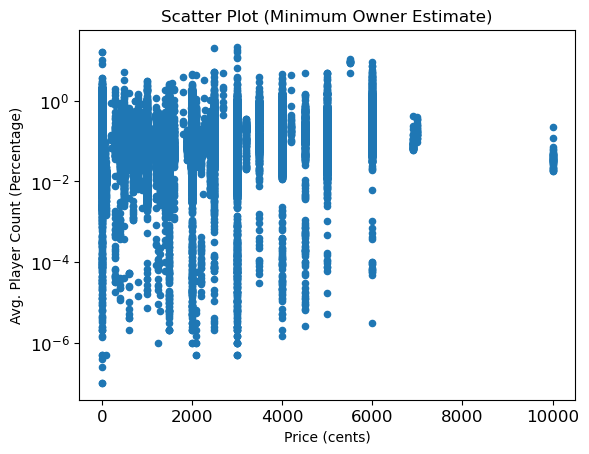

In [23]:
df[df["min_owners"] > 30000].plot.scatter(x = "price", y = "min_player_proportion", 
                                          logy=True, fontsize=12,
                                          xlabel="Price (cents)",
                                          ylabel="Avg. Player Count (Percentage)",
                                          title="Scatter Plot (Minimum Owner Estimate)")
# Lower bound of estimated owners

<AxesSubplot:title={'center':'Scatter Plot (Average Owner Estimate)'}, xlabel='Price (cents)', ylabel='Avg. Player Count (Percentage)'>

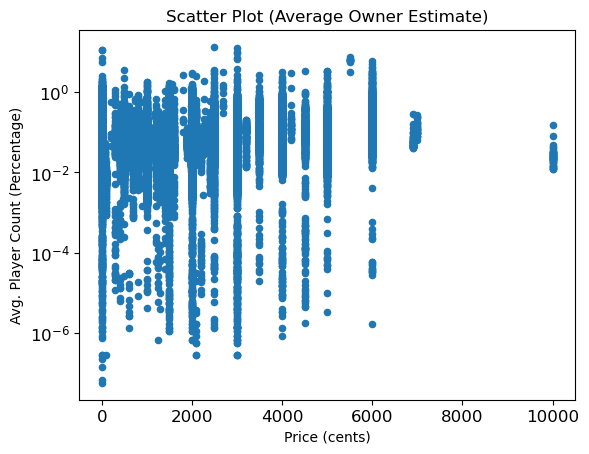

In [24]:
df[df["min_owners"] > 30000].plot.scatter(x = "price", y = "avg_player_proportion", 
                                          logy=True, fontsize=12,
                                          xlabel="Price (cents)",
                                          ylabel="Avg. Player Count (Percentage)",
                                          title="Scatter Plot (Average Owner Estimate)")
# Average estimated owners

<AxesSubplot:title={'center':'Scatter Plot (Maximum Owner Estimate)'}, xlabel='Price (cents)', ylabel='Avg. Player Count (Percentage)'>

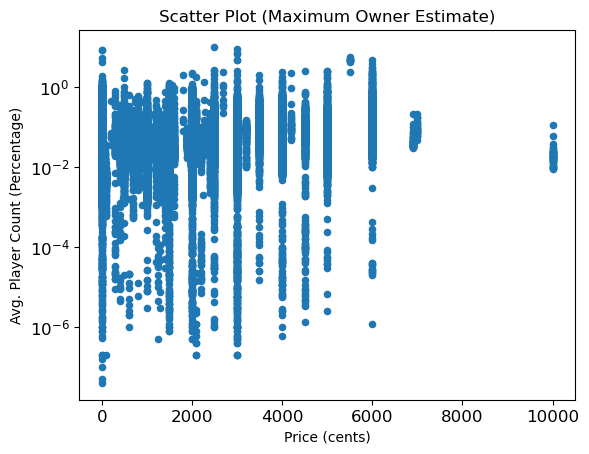

In [25]:
df[df["min_owners"] > 30000].plot.scatter(x = "price", y = "max_player_proportion", 
                                          logy=True, fontsize=12,
                                          xlabel="Price (cents)",
                                          ylabel="Avg. Player Count (Percentage)",
                                          title="Scatter Plot (Maximum Owner Estimate)")
# Upper-bound of estimated owners

<AxesSubplot:ylabel='Density'>

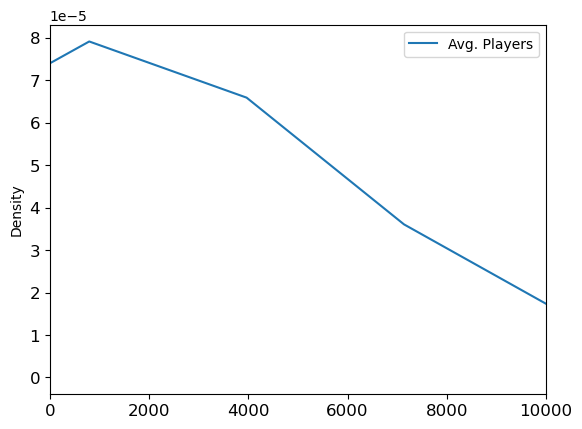

In [26]:
df[df["min_owners"] > 30000].plot.kde(x = "price", y = "Avg. Players", 
                                     xlim=[0, 10000],
                                     fontsize=12 
                                     )

Text(0.5, 0.98, 'Joint Plot (Minimum Owner Estimate)')

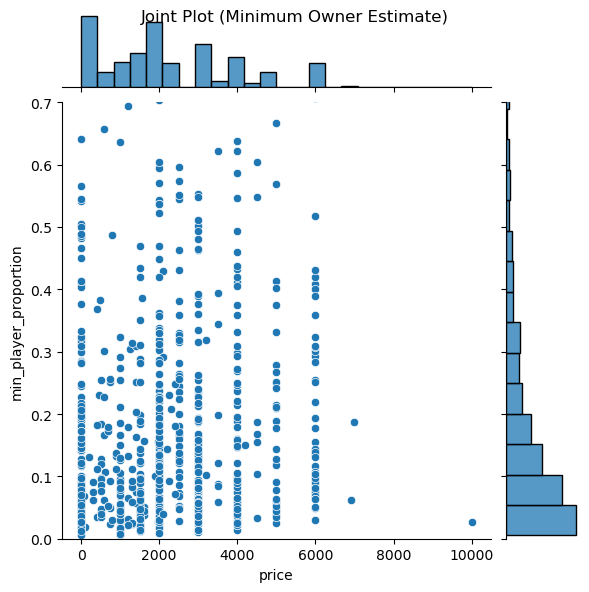

In [27]:
sns.jointplot(x = "price", y = "min_player_proportion", 
              data = df[(df["min_owners"] > 30000) & (df["Month"] == "February 2022")], 
              ylim=[0, 0.7]).fig.suptitle("Joint Plot (Minimum Owner Estimate)")
# Minimum estimated owners

Text(0.5, 0.98, 'Joint Plot (Average Owner Estimate)')

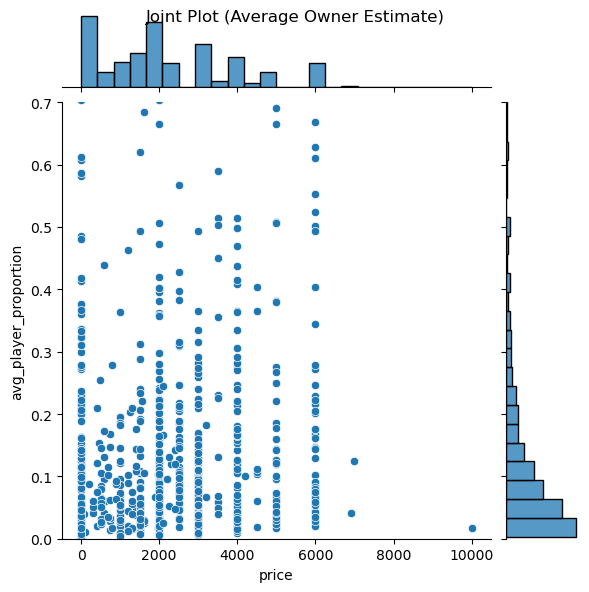

In [28]:
sns.jointplot(x = "price", y = "avg_player_proportion", 
              data = df[(df["min_owners"] > 30000) & (df["Month"] == "February 2022")], 
              ylim=[0, 0.7]).fig.suptitle("Joint Plot (Average Owner Estimate)")
# Average estimated owners

Text(0.5, 0.98, 'Joint Plot (Maximum Owner Estimate)')

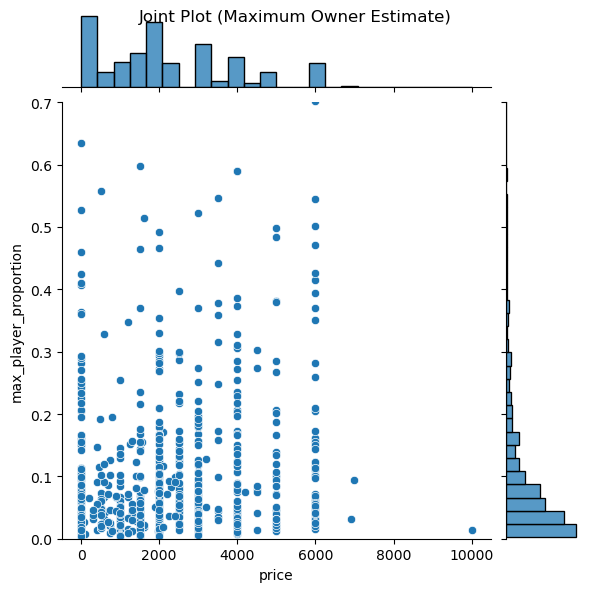

In [29]:
sns.jointplot(x = "price", y = "max_player_proportion", 
              data = df[(df["min_owners"] > 30000) & (df["Month"] == "February 2022")], 
              ylim=[0, 0.7]).fig.suptitle("Joint Plot (Maximum Owner Estimate)")
# Maximum estimated owners

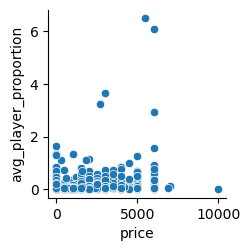

In [30]:
sns.pairplot(x_vars = "price", y_vars = "avg_player_proportion", 
            data = df[(df["min_owners"] > 30000) & (df["Month"] == "February 2022")]
            )
# note: not used in final presentation

In [31]:
df[df["min_owners"] > 30000].corr() # check correlation between avg_player_proportion and price/oldprice/initialprice

,Avg. Players,Peak Players,appid,price,oldprice,initialprice,discount,min_owners,max_owners,avg_owners,avg_player_proportion,min_player_proportion,max_player_proportion
Avg. Players,1.000000,0.988003,-0.056787,-0.076221,-0.077604,-0.082983,-0.029397,0.736130,0.713160,0.721395,0.198888,0.190786,0.201988
Peak Players,0.988003,1.000000,-0.045574,-0.070202,-0.071749,-0.076384,-0.027458,0.707476,0.686042,0.693749,0.206444,0.198471,0.209472
appid,-0.056787,-0.045574,1.000000,0.182135,0.166046,0.196390,0.011369,-0.173442,-0.177972,-0.176705,0.273087,0.272466,0.272809
price,-0.076221,-0.070202,0.182135,1.000000,0.885177,0.923028,0.061842,-0.170023,-0.171991,-0.171546,0.115752,0.118884,0.114168
oldprice,-0.077604,-0.071749,0.166046,0.885177,1.000000,0.946670,-0.188876,-0.167980,-0.171391,-0.170479,0.108254,0.110905,0.106893
initialprice,-0.082983,-0.076384,0.196390,0.923028,0.946670,1.000000,0.080090,-0.180619,-0.184358,-0.183354,0.112960,0.114988,0.111859
discount,-0.029397,-0.027458,0.011369,0.061842,-0.188876,0.080090,1.000000,-0.060334,-0.062235,-0.061689,-0.018833,-0.020113,-0.018242
min_owners,0.736130,0.707476,-0.173442,-0.170023,-0.167980,-0.180619,-0.060334,1.000000,0.994889,0.997658,0.042771,0.037877,0.044798
max_owners,0.713160,0.686042,-0.177972,-0.171991,-0.171391,-0.184358,-0.062235,0.994889,1.000000,0.999466,0.037576,0.034089,0.039006
avg_owners,0.721395,0.693749,-0.176705,-0.171546,-0.170479,-0.183354,-0.061689,0.997658,0.999466,1.000000,0.039300,0.035354,0.040925


In [32]:
df.corr()

,Avg. Players,Peak Players,appid,price,oldprice,initialprice,discount,min_owners,max_owners,avg_owners,avg_player_proportion,min_player_proportion,max_player_proportion
Avg. Players,1.000000,0.988043,-0.055309,-0.074309,-0.075860,-0.081236,-0.029338,0.733888,0.710953,0.719173,0.071242,0.173445,0.072089
Peak Players,0.988043,1.000000,-0.044335,-0.068247,-0.069945,-0.074583,-0.027410,0.705276,0.683874,0.691567,0.071731,0.180423,0.072608
appid,-0.055309,-0.044335,1.000000,0.184282,0.165505,0.194295,0.008895,-0.176156,-0.180876,-0.179551,0.036778,0.289441,0.037989
price,-0.074309,-0.068247,0.184282,1.000000,0.885046,0.922562,0.060919,-0.170419,-0.172425,-0.171969,0.026509,0.114270,0.026976
oldprice,-0.075860,-0.069945,0.165505,0.885046,1.000000,0.947091,-0.188551,-0.167790,-0.171205,-0.170291,0.021510,0.109733,0.021973
initialprice,-0.081236,-0.074583,0.194295,0.922562,0.947091,1.000000,0.079302,-0.180264,-0.183999,-0.182996,0.020602,0.112474,0.021085
discount,-0.029338,-0.027410,0.008895,0.060919,-0.188551,0.079302,1.000000,-0.059879,-0.061758,-0.061219,-0.002534,-0.021814,-0.002616
min_owners,0.733888,0.705276,-0.176156,-0.170419,-0.167790,-0.180264,-0.059879,1.000000,0.994894,0.997660,-0.005197,0.029108,-0.005012
max_owners,0.710953,0.683874,-0.180876,-0.172425,-0.171205,-0.183999,-0.061758,0.994894,1.000000,0.999466,-0.005484,0.025373,-0.005328
avg_owners,0.719173,0.691567,-0.179551,-0.171969,-0.170291,-0.182996,-0.061219,0.997660,0.999466,1.000000,-0.005397,0.026611,-0.005231


(0.0, 0.7)

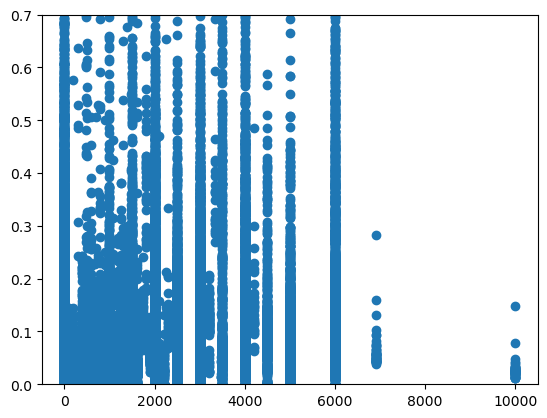

In [33]:
plt.scatter(x=df["oldprice"], y=df["avg_player_proportion"])
ax = plt.gca()
ax.set_ylim(0, 0.7)
#note: not used in final presentation

<AxesSubplot:title={'center':'Frequency of min_player_proportion'}, ylabel='Frequency'>

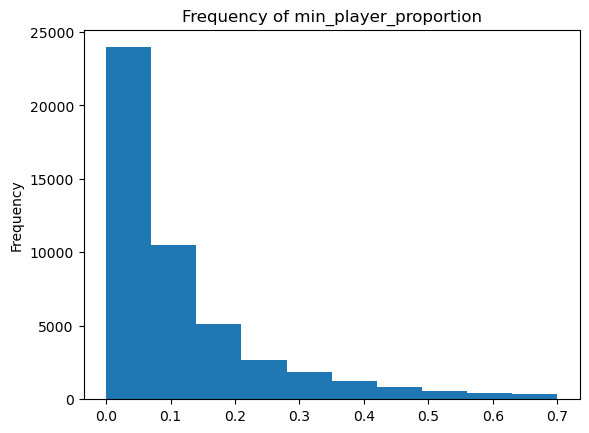

In [34]:
df[(df["min_owners"] > 30000) & (df["min_player_proportion"] < 0.7)]["min_player_proportion"].plot.hist(
    title = "Frequency of min_player_proportion")
# lower bound owner estimate

<AxesSubplot:title={'center':'Frequency of avg_player_proportion'}, ylabel='Frequency'>

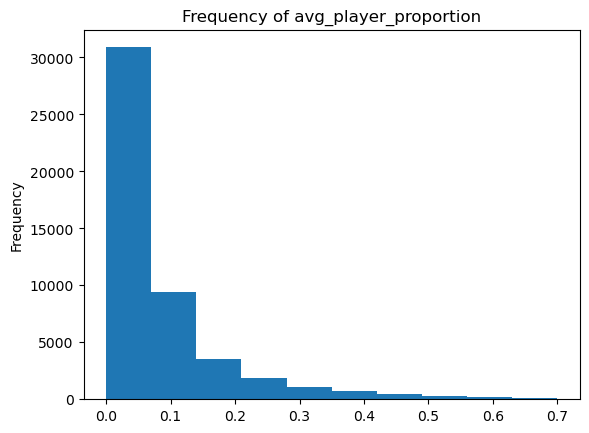

In [35]:
df[(df["min_owners"] > 30000) & (df["avg_player_proportion"] < 0.7)]["avg_player_proportion"].plot.hist(
    title = "Frequency of avg_player_proportion")
# average owner estimate

<AxesSubplot:title={'center':'Frequency of max_player_proportion'}, ylabel='Frequency'>

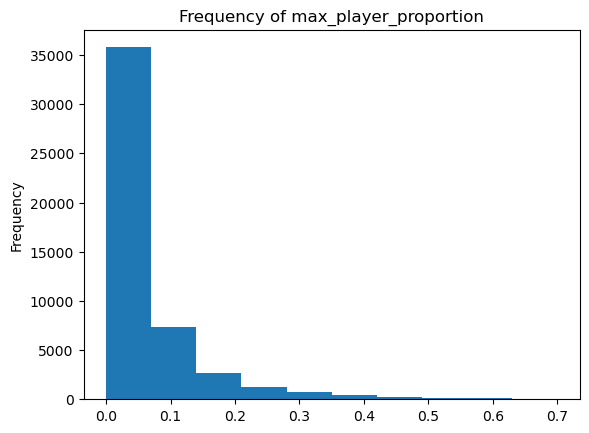

In [36]:
df[(df["min_owners"] > 30000) & (df["max_player_proportion"] < 0.7)]["max_player_proportion"].plot.hist(
    title = "Frequency of max_player_proportion")
# upper bound owner estimate

<AxesSubplot:title={'center':'Frequency of min_player_proportion'}, ylabel='Frequency'>

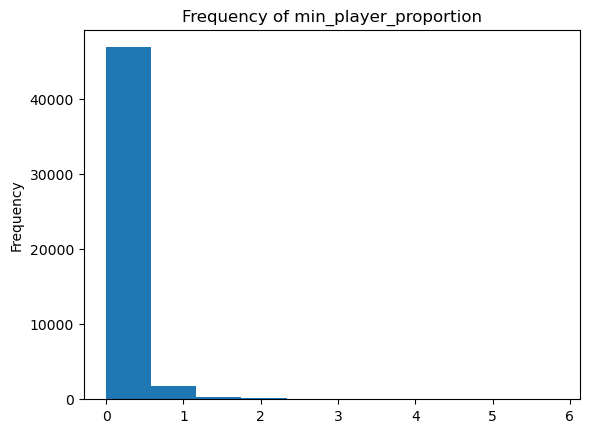

In [37]:
df[(df["min_owners"] > 30000) & (df["min_player_proportion"] < 6)]["min_player_proportion"].plot.hist(
    title = "Frequency of min_player_proportion")
# lower bound owner estimate

<AxesSubplot:title={'center':'Frequency of avg_player_proportion'}, ylabel='Frequency'>

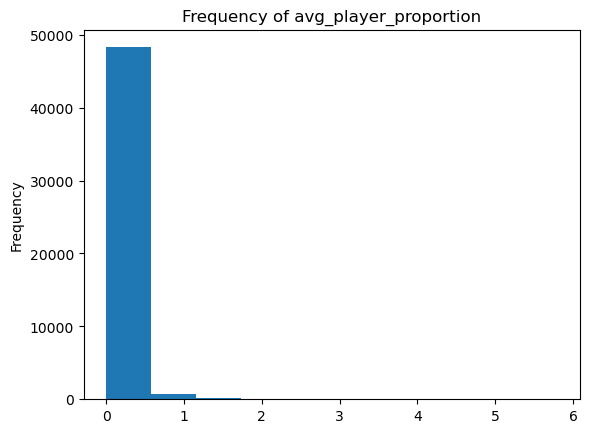

In [38]:
df[(df["min_owners"] > 30000) & (df["avg_player_proportion"] < 6)]["avg_player_proportion"].plot.hist(
    title = "Frequency of avg_player_proportion")
# average owner estimate

<AxesSubplot:title={'center':'Frequency of max_player_proportion'}, ylabel='Frequency'>

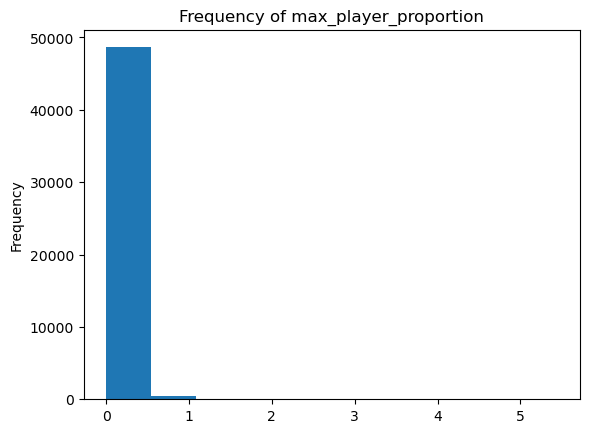

In [39]:
df[(df["min_owners"] > 30000) & (df["max_player_proportion"] < 6)]["max_player_proportion"].plot.hist(
    title = "Frequency of max_player_proportion")
# upper bound owner estimate